# Morphological Operators in OpenCV

## <a name = "tob">Table of Content</a>
<ol style = "type:1">
    <li><a href = "#erosion">Erosion (Erodes Away Boundaries of Foreground Objects)</a></li>
    <li><a href = "#opening">Opening (Removing Background Noise)</a></li>
    <li><a href = "#foregroundnoise">Creating Foreground Noise</a></li>
    <li><a href = "#closing">Closing (Removing Foreground Noise)</a></li>
    <li><a href = "#morphgrad">Morphological Gradient</a></li>
    <li><a href = "#ref">References</a></li>
</ol>

Morphological operators are sets of (matrix) kernels that can achieve a variety of effects, such as reducing noise. This is accomplished by doing a convolution between the kernel and an image. Most kernels have sum of entries equals to 1 (i.e., [Normalisation](https://en.wikipedia.org/wiki/Kernel_(image_processing)#Normalization)). This is to ensure the average pixel in the modified iage is as bright as the average pixel in the original image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will practice various morphological operators on some simple white text on a black background.

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.putText(blank_img, 
                text = 'ABCDE', 
                org = (50,300), 
                fontFace = font, 
                fontScale = 5, 
                color = (255,255,255), 
                thickness = 25, 
                lineType = cv2.LINE_AA)
    
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

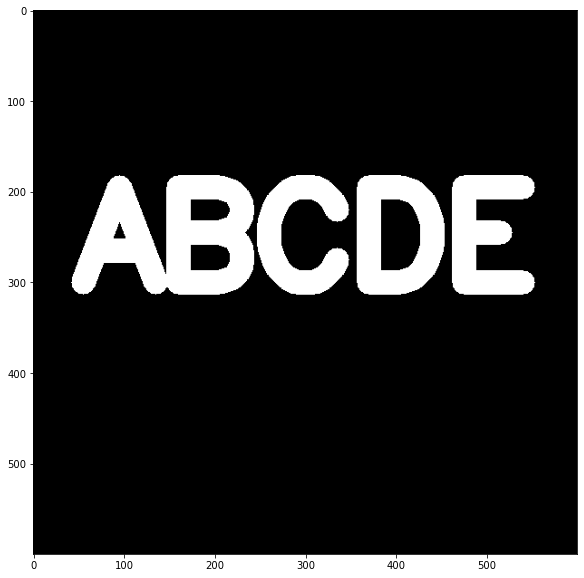

In [4]:
img = load_img()
display_img(img)

## <a name = "erosion">Erosion</a>

Morphological operatrs are specialised kernels to achieve a specific effect. The first we are going to look at is **<i>erosion</i>**. It **<i>erodes away boundaries of foreground objects</i>**. We begin by create the kernel

In [6]:
kernel = np.ones((5,5), dtype = np.uint8)

In [7]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [8]:
result = cv2.erode(img, kernel, iterations = 1)

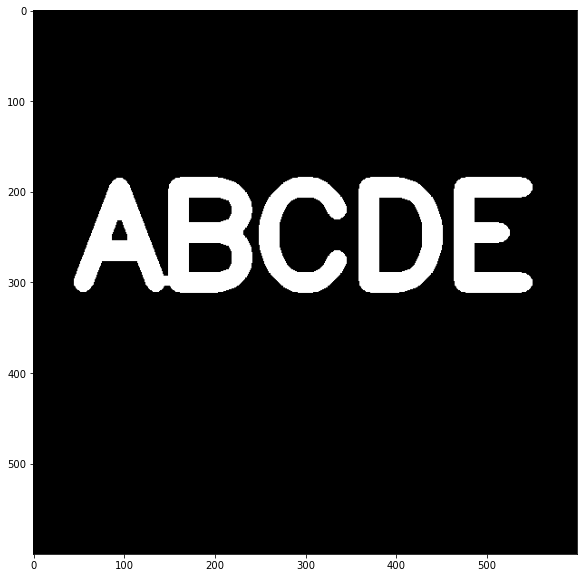

In [9]:
display_img(result)

Notice how erosion changes the connection between `A` and `B`. Let's see a more extreme version of this.

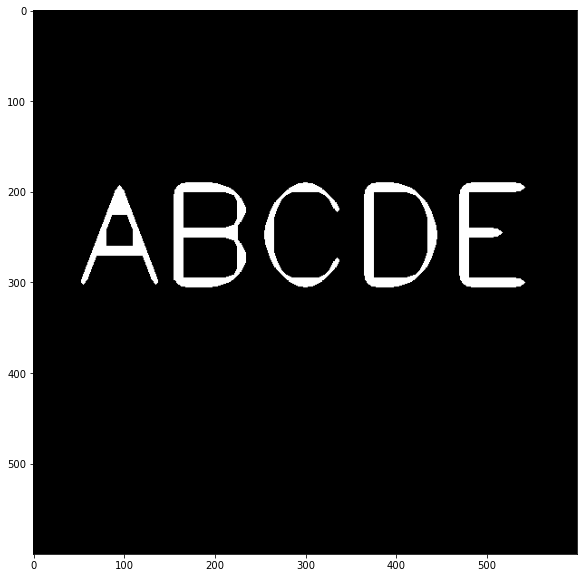

In [10]:
result = cv2.erode(img, kernel, iterations = 4)
display_img(result)

We can edit the dimension of the kernel. However, we edit the `iterations` argument more often in practise.

## <a name = "opening">Opening</a>

Opening is "erosion then dilation". **<i>Opening is used in removing background noise.</i>** Let's create some white noise and put it into our original image.

In [11]:
img = load_img()

In [12]:
white_noise = np.random.randint(low = 0, 
                                high = 2, 
                                size = (600, 600)
                               )

The white noise is an 600-by-600 binary array. If we display the white noise

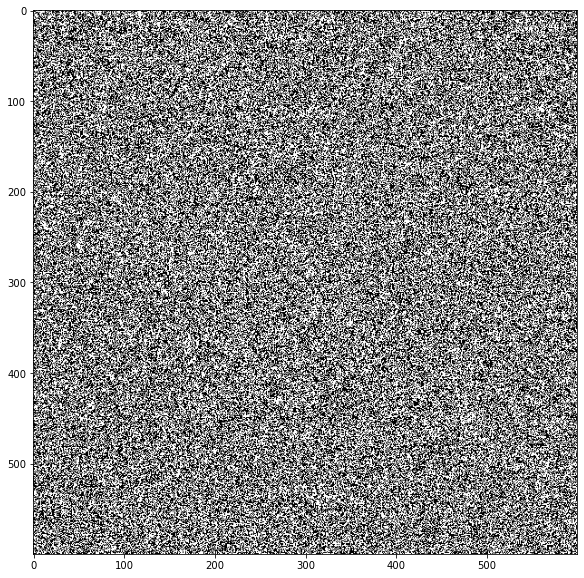

In [13]:
display_img(white_noise)

we see a random collection of black and white points. To put the white noise into our original image, we first check `img.max() = 255.0`. Therefore, we need to convert the white noise matrix to have entries either 0 or 255.

In [15]:
white_noise *= 255

After that, we add the images.

In [17]:
noise_img = white_noise + img

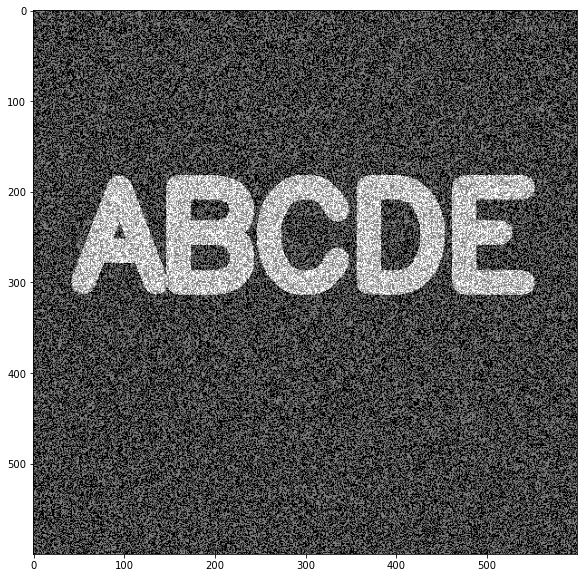

In [18]:
display_img(noise_img)

Opening is used in noise reduction.

In [19]:
opening = cv2.morphologyEx(noise_img, 
                           cv2.MORPH_OPEN, 
                           kernel
                          )

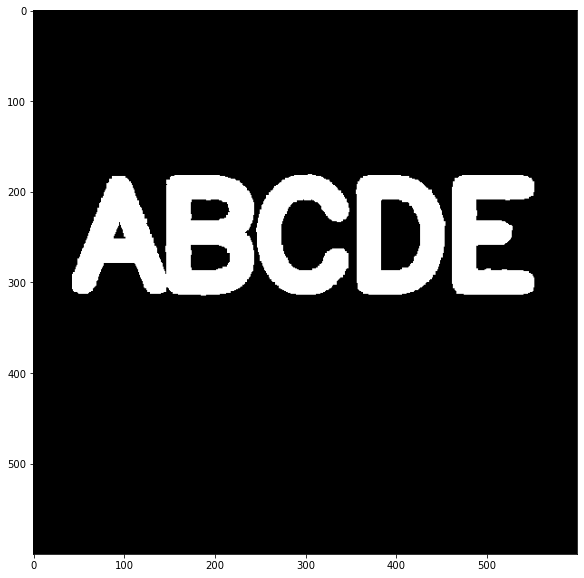

In [20]:
display_img(opening)

We are able to clear out the <i>background noise</i> without too much distortion of the original image. What about <i>foregroun noise?</i>

## <a name = "foregroundnoise">Creating Foreground Noise</a>

In [21]:
img = load_img()

In [22]:
black_noise = np.random.randint(low = 0, 
                                high = 2, 
                                size = (600, 600)
                               )

In [24]:
black_noise *= -255

In [27]:
black_noise

array([[   0, -255, -255, ...,    0,    0, -255],
       [   0, -255,    0, ...,    0,    0,    0],
       [-255, -255,    0, ..., -255,    0, -255],
       ...,
       [   0,    0,    0, ...,    0,    0, -255],
       [-255, -255,    0, ..., -255, -255, -255],
       [-255, -255, -255, ..., -255,    0,    0]])

Mathematically, `black_noise` subtracts 255 from every single pixel randomly. A black (resp. white) pixel's value will change from 0 to -255 (resp. from 255 to 0).

In [25]:
black_noise_img = black_noise + img

In [28]:
black_noise_img

array([[   0., -255., -255., ...,    0.,    0., -255.],
       [   0., -255.,    0., ...,    0.,    0.,    0.],
       [-255., -255.,    0., ..., -255.,    0., -255.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0., -255.],
       [-255., -255.,    0., ..., -255., -255., -255.],
       [-255., -255., -255., ..., -255.,    0.,    0.]])

Now, RGB takes value in `[0, 255]`. Therefore, we need to bring the negative values up to 0. This leaves only noise on foreground.

In [29]:
black_noise_img[black_noise_img == -255] = 0

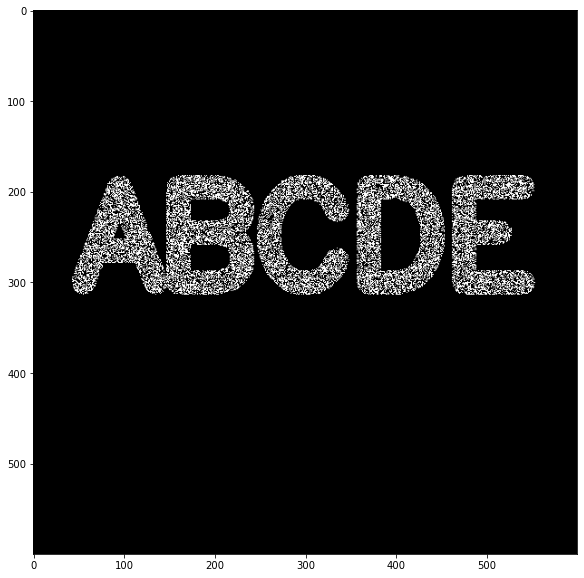

In [30]:
display_img(black_noise_img)

Compare this with displaying the image without bringing up the -255 values.

The image is a bunch of black points in the foreground, and we can use closing to clean it up.

## <a name = "closing">Closing</a>

**<i>Closing cleans foreground noise.</i>** 

In [31]:
closing = cv2.morphologyEx(black_noise_img, 
                           cv2.MORPH_CLOSE, 
                           kernel
                          )

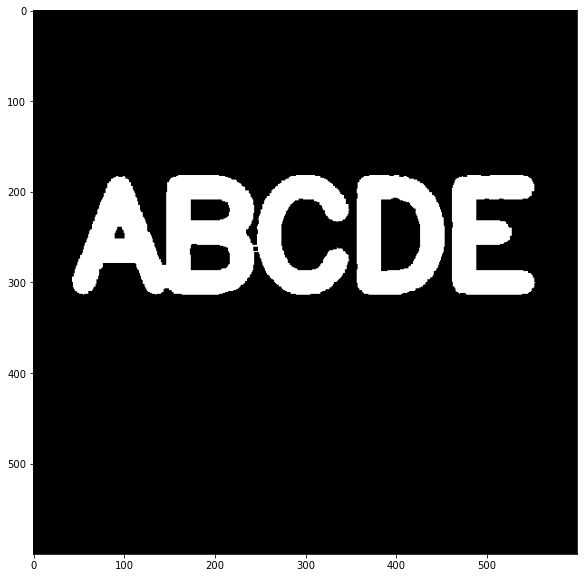

In [32]:
display_img(closing)

## <a name = "morphgrad">Morphological Gradient</a>

We already know:

<ol style = "type:1">
    <li>erosion removes content in between foreground and backgroun edges (e.g., it makes the alphabets thinner.);</li>
    <li>dilation adds content in between foreground and backgroun edges (e.g., it makes the alphabets more bubble.).</li>
</ol>

Morphological grandient takes the difference between the two. This is a method of edge detection.

In [33]:
gradient = cv2.morphologyEx(img, 
                            cv2.MORPH_GRADIENT, 
                            kernel
                           )

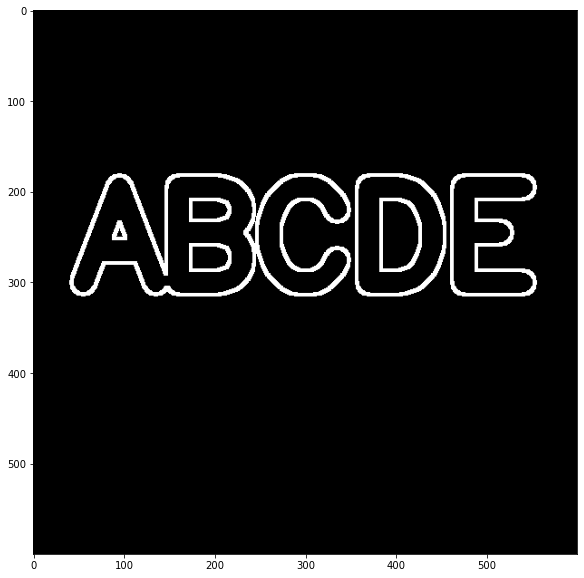

In [34]:
display_img(gradient)

## <a name = "ref">References</a>

<ol style = "type:1">
    <li>Jose Portilla. Python for Computer Vision with OpenCV and Deep Learning.</li>
    <li> Kernel (image processing). Wikipedia. <a><href = "https://en.wikipedia.org/wiki/Kernel_(image_processing)">https://en.wikipedia.org/wiki/Kernel_(image_processing)</a></li>
</ol>